Scanning path: /Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data
Detected categories: ['yak', 'yal', 'yae', 'yab', 'yaw', 'yakk', 'yay', 'yagg', 'yad', 'yam', 'yaj', 'yax', 'yagh', 'yaq', 'yach', 'yey', 'yarr', 'ya', 'yazz', 'yi', 'yass', 'yu', 'yat', 'yas', 'yaz', 'yah', 'yaf', 'yahh', 'yar', 'yadd', 'yag', 'yan', 'yatt']
Found 854 images in yak
Found 854 images in yalm yak class.
Found 854 images in yaem yal class.
Found 854 images in yabm yae class.
Found 854 images in yawm yab class.
Found 854 images in yakk yaw class.
Found 854 images in yaym yakk class.
Found 854 images in yagg yay class.
Found 854 images in yadm yagg class.
Found 854 images in yamm yad class.
Found 854 images in yajm yam class.
Found 854 images in yaxm yaj class.
Found 854 images in yagh yax class.
Found 854 images in yaqm yagh class.
Found 854 images in yach yaq class.
Found 854 images in yeym yach class.
Found 854 images in yarr yey class.
Found 854 images in yaom yarr cl

<Figure size 640x480 with 0 Axes>

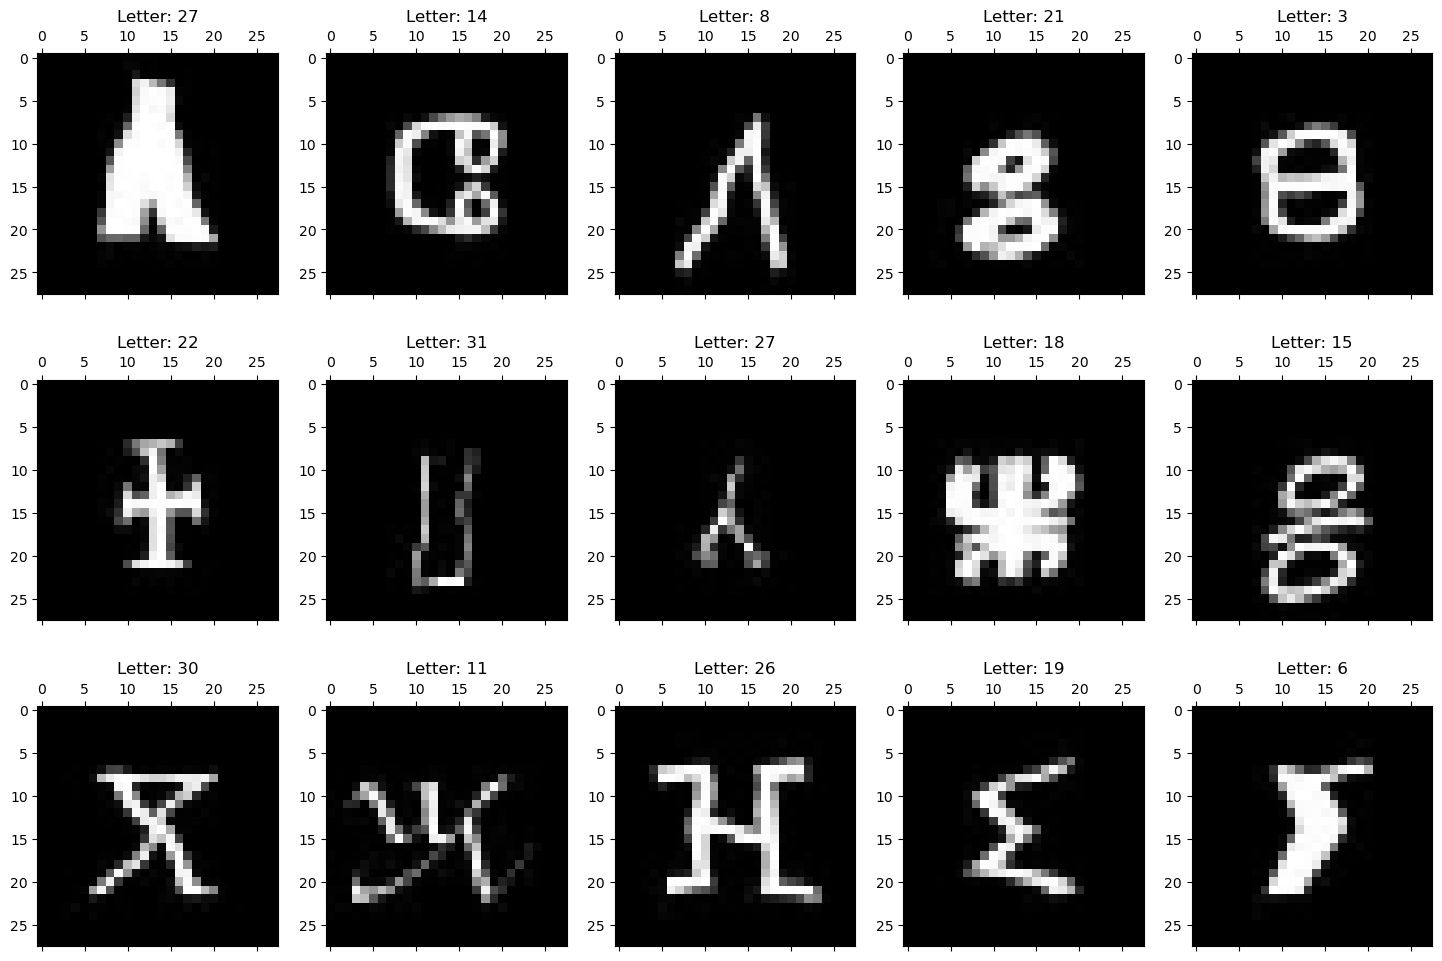

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.113s...
[t-SNE] Computed neighbors for 5000 samples in 7.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.048920
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.401077
[t-SNE] KL divergence after 300 iterations: 2.356708
t-SNE done! Time elapsed: 147.73491191864014 seconds


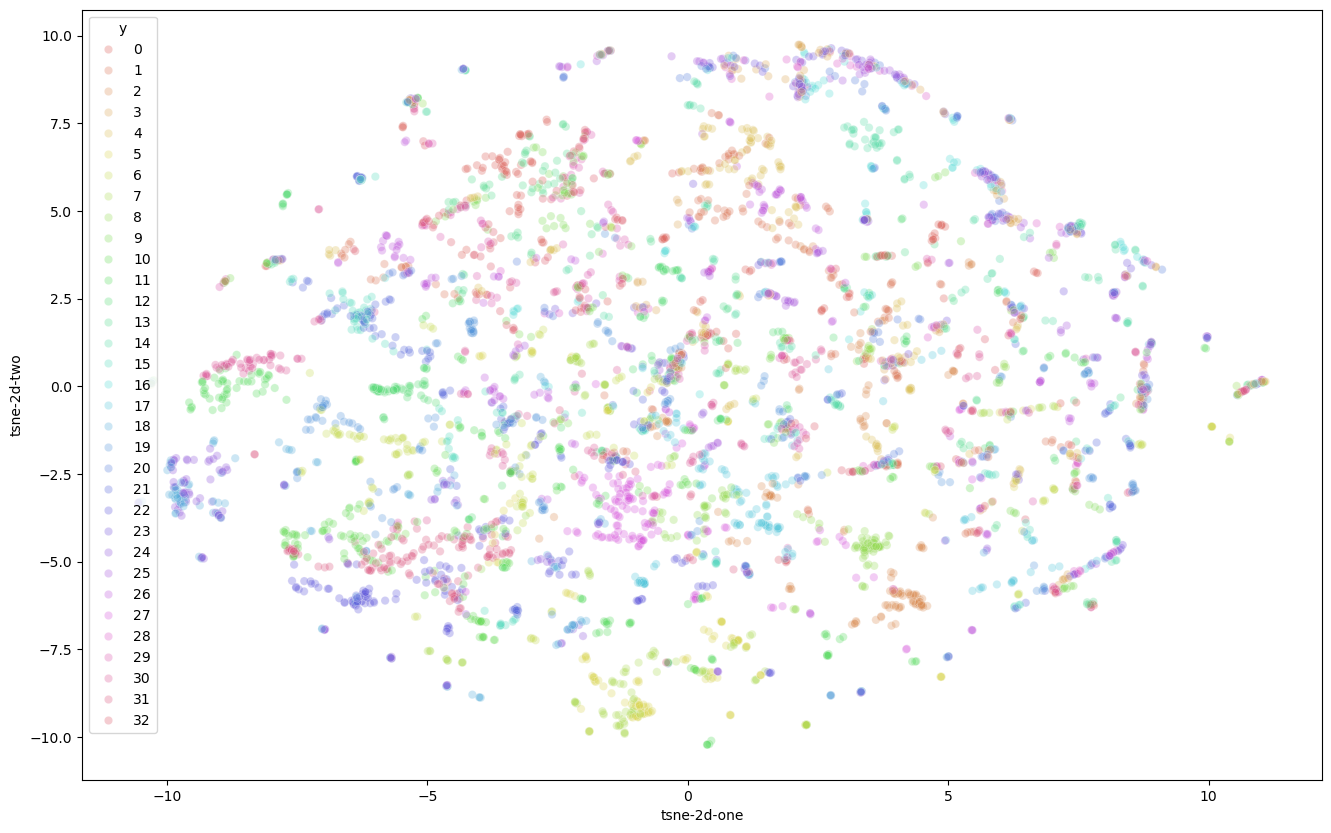

In [1]:
import time
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

"""## The libraries we will use"""

"""## Data loading and adaptation"""

def upload_data(path_name, number_of_images_per_class):
    X_Data = []
    Y_Data = []
    if not os.path.exists(path_name):
        print(f"Error: Path does not exist: {path_name}")
        return np.array([]), np.array([])
    print(f"Scanning path: {path_name}")
    # Dynamically get all subdirectories as categories
    categories = [d for d in os.listdir(path_name) if os.path.isdir(os.path.join(path_name, d))]
    if not categories:
        print(f"No subdirectories found in {path_name}")
        return np.array([]), np.array([])
    print(f"Detected categories: {categories}")
    for idx, category in enumerate(categories):
        category_path = os.path.join(path_name, category)
        if os.path.isdir(category_path):
            images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"Found {len(images)} images in {category}")
            if images:
                images_to_use = images[:min(number_of_images_per_class, len(images))]  # Limit to available images
                for img_file in images_to_use:
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path, 0)  # Load as grayscale
                    if img is not None:
                        # Resize image to 28x28 to match expected shape
                        img_resized = cv2.resize(img, (28, 28))
                        X_Data.append(img_resized)
                        Y_Data.append(idx)
                    else:
                        print(f"Failed to load image: {img_path}")
                print(f"> Loaded {len(images_to_use)} images from {category} class.", end='\r')
            else:
                print(f"No images found in {category}")
        else:
            print(f"Directory not found for category: {category}")
    return np.array(X_Data), np.array(Y_Data)

n_class = 33  # Adjust based on actual number of categories
n_train = 200  # Reduced to a safe number (adjust based on dataset size)

x_data, y_data = upload_data('/Users/macbook/Desktop/M2/Prof M. Benaddy Deep Learning/Tp 4/Tifinagh/Dataset/train_data', n_train)

x_data = x_data.astype('float32')
x_data = np.reshape(x_data, (x_data.shape[0], 28 * 28))  # Flatten to 784 pixels
x_data /= 255
print('x_data shape:', x_data.shape)
print(x_data.shape[0], 'data samples')

"""## Convert images and label vector to a Pandas DataFrame"""

feat_cols = ['pixel' + str(i) for i in range(x_data.shape[1])]
df = pd.DataFrame(x_data, columns=feat_cols)
df['y'] = y_data
df['label'] = df['y'].apply(lambda i: str(i))
x_data, y_data = None, None
print('Size of the dataframe: {}'.format(df.shape))
df.head()

"""## Displaying images from the Dataframe"""

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure(figsize=(18, 12))
for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i + 1, title="Letter: {}".format(str(df.loc[rndperm[i], 'label'])))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))
plt.show()

"""## Launch of the T-SNE algorithm"""

N = 5000  # Reduced from 50000 to manage memory and time
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

"""## Visualization"""

df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 33),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()